In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression


In [19]:
df_with_emojis = pd.read_csv('../datasets/df_with_emojis.csv')
df_without_emojis = pd.read_csv('../datasets/df_without_emojis.csv')

df_with_emojis = df_with_emojis.dropna()
df_without_emojis = df_without_emojis.dropna()

In [20]:
X_train_emojis, X_test_emojis, y_train_emojis, y_test_emojis = train_test_split(
    df_with_emojis['text'], df_with_emojis['sentiment'], test_size=0.2, random_state=42)

X_train_no_emojis, X_test_no_emojis, y_train_no_emojis, y_test_no_emojis = train_test_split(
    df_without_emojis['text'], df_without_emojis['sentiment'], test_size=0.2, random_state=42)

In [21]:
vectorizer = TfidfVectorizer(max_features=5000) 
X_train_emojis_vec = vectorizer.fit_transform(X_train_emojis)
X_test_emojis_vec = vectorizer.transform(X_test_emojis)
X_train_no_emojis_vec = vectorizer.fit_transform(X_train_no_emojis)
X_test_no_emojis_vec = vectorizer.transform(X_test_no_emojis)

print(f"Formato da matriz TF-IDF (treino) - com emojis: {X_train_emojis_vec.shape}")
print(f"Formato da matriz TF-IDF (treino) - sem emojis: {X_train_no_emojis_vec.shape}")

Formato da matriz TF-IDF (treino) - com emojis: (1274444, 5000)
Formato da matriz TF-IDF (treino) - sem emojis: (1274420, 5000)


In [22]:
def plot_confusion_matrix(y_true, y_pred, title, class_labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(title)
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.show()

In [23]:
lr_emojis = LogisticRegression(max_iter=200, random_state=42)
lr_emojis.fit(X_train_emojis_vec, y_train_emojis)

y_pred_emojis = lr_emojis.predict(X_test_emojis_vec)

print("Regressão Logística - Com Emojis")
print(classification_report(y_test_emojis, y_pred_emojis))


Regressão Logística - Com Emojis
              precision    recall  f1-score   support

           0       0.78      0.75      0.76    158645
           1       0.76      0.79      0.78    159967

    accuracy                           0.77    318612
   macro avg       0.77      0.77      0.77    318612
weighted avg       0.77      0.77      0.77    318612



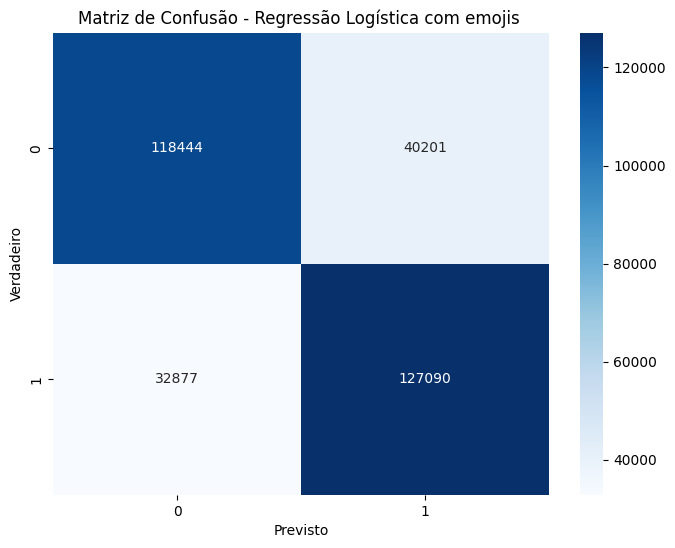

In [24]:
class_labels = np.unique(y_test_emojis)

plot_confusion_matrix(y_test_emojis, y_pred_emojis, "Matriz de Confusão - Regressão Logística com emojis ", class_labels)

In [25]:
lr_no_emojis = LogisticRegression(max_iter=200, random_state=42)
lr_no_emojis.fit(X_train_no_emojis_vec, y_train_no_emojis)

y_pred_no_emojis = lr_no_emojis.predict(X_test_no_emojis_vec)

print("Regressão Logística - Sem Emojis")
print(classification_report(y_test_no_emojis, y_pred_no_emojis))

Regressão Logística - Sem Emojis
              precision    recall  f1-score   support

           0       0.78      0.76      0.77    158542
           1       0.77      0.79      0.78    160064

    accuracy                           0.78    318606
   macro avg       0.78      0.78      0.78    318606
weighted avg       0.78      0.78      0.78    318606



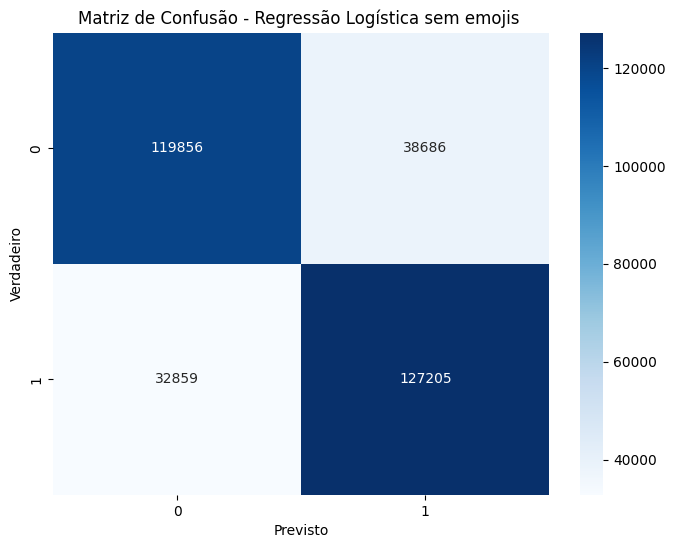

In [26]:
class_labels = np.unique(y_test_no_emojis)

plot_confusion_matrix(y_test_no_emojis, y_pred_no_emojis, "Matriz de Confusão - Regressão Logística sem emojis ", class_labels)